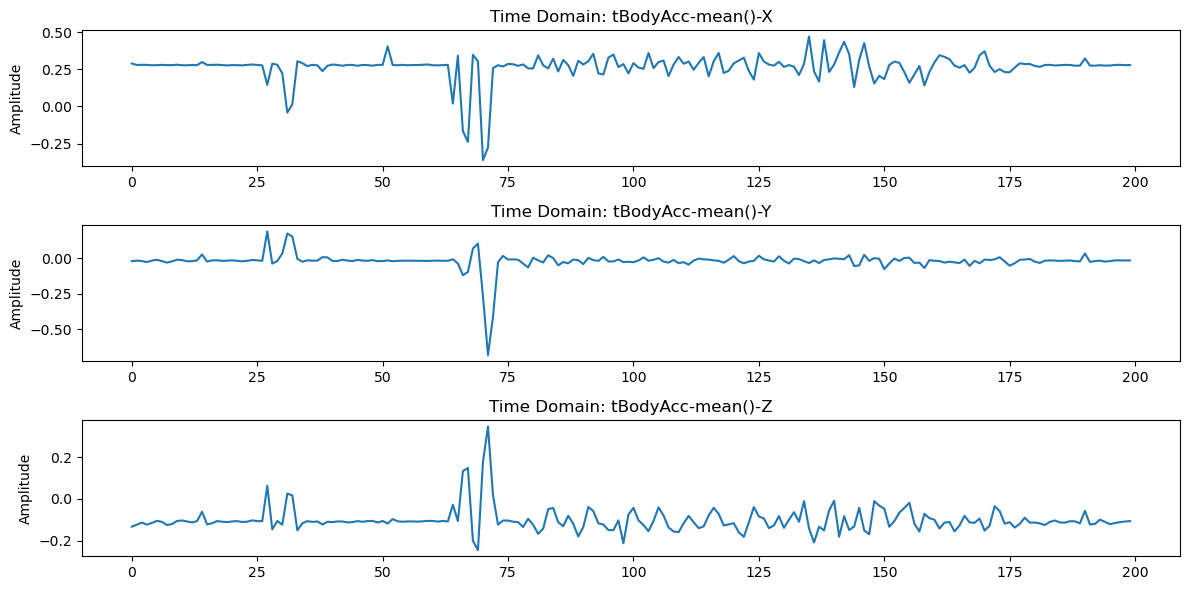

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the training dataset containing features
df = pd.read_csv('X_train.csv')

# Select specific time-domain features from the DataFrame
time_features = df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y',
                    'tBodyAcc-mean()-Z']]

# Load the labels corresponding to the training dataset
labels = pd.read_csv('y_train.csv')

label_names = pd.read_csv('activity_labels.txt', sep=' ',
                          header=None, names=['id', 'name'])

# Convert the labels DataFrame into a one-dimensional array
labels = labels.values.flatten()

# Plot the time-domain features
plt.figure(figsize=(12, 6))  # Set the figure size
for i, col in enumerate(time_features.columns):
    plt.subplot(3, 1, i+1)  # Create a subplot for each feature
    plt.plot(time_features[col].values[:200])  # Plot the first 200 samples
    plt.title(f'Time Domain: {col}')  # Set the title for each subplot
    plt.ylabel('Amplitude')  # Label the y-axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

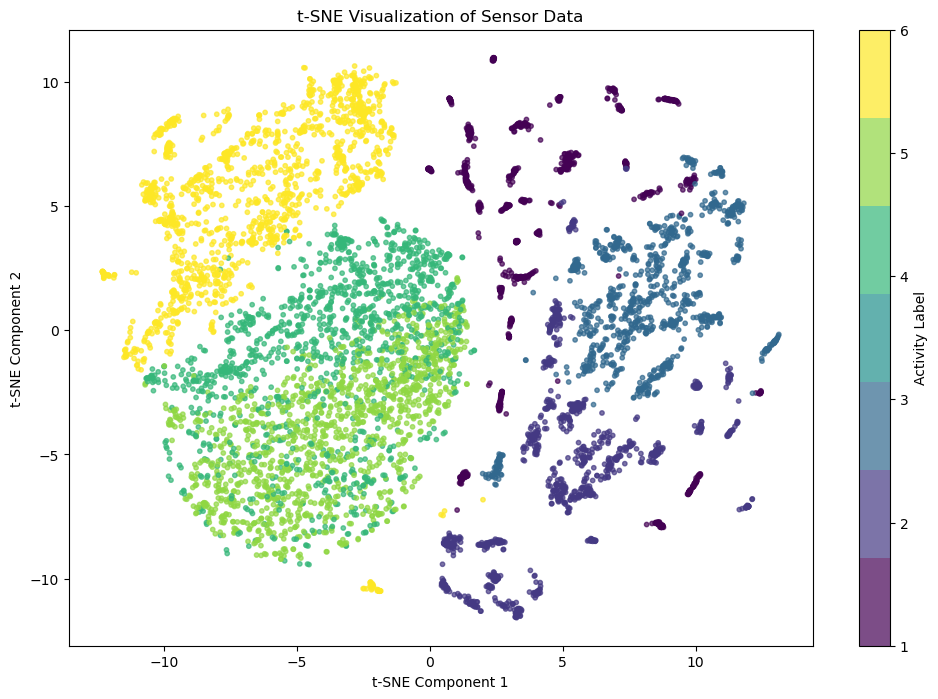

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Standardize the dataset to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform t-SNE dimensionality reduction
tsne = TSNE(
    n_components=2,  # Reduce to 2 dimensions for visualization
    perplexity=30,  # Controls the balance between local and global aspects
    max_iter=300,  # Maximum number of iterations for optimization
    learning_rate=200,  # Step size for optimization
    random_state=42  # Ensure reproducibility
)
tsne_embeddings = tsne.fit_transform(scaled_data)

# Visualize the t-SNE results
plt.figure(figsize=(12, 8))  # Set the figure size
scatter = plt.scatter(
    tsne_embeddings[:, 0],  # First t-SNE component
    tsne_embeddings[:, 1],  # Second t-SNE component
    c=labels,  # Use activity labels for coloring
    cmap=plt.get_cmap("viridis", np.max(labels)+1),  # Colormap for labels
    s=10,  # Marker size
    alpha=0.7  # Transparency of markers
)
plt.colorbar(scatter, ticks=np.unique(labels),
             label="Activity Label")  # Add colorbar with labels
plt.title("t-SNE Visualization of Sensor Data")  # Set the plot title
plt.xlabel("t-SNE Component 1")  # Label for x-axis
plt.ylabel("t-SNE Component 2")  # Label for y-axis
plt.show()  # Display the plot

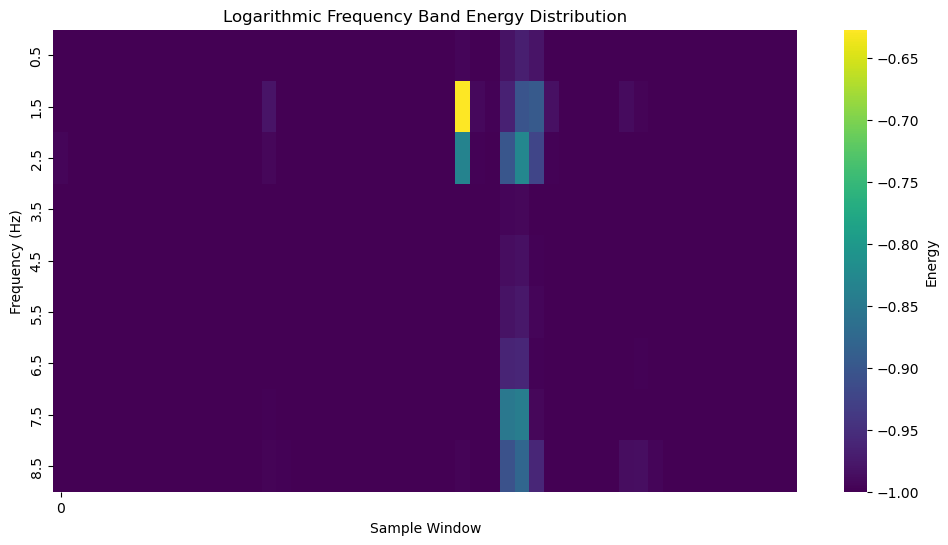

In [9]:
import matplotlib.ticker as ticker
import seaborn as sns

# Select specific frequency band energy features (example: 1-16Hz frequency band)
freq_bands = df.filter(regex='bandsEnergy\\(\\)-1,16')

# Create a logarithmic frequency range for the y-axis (1-16Hz, logarithmic scale)
# Logarithmic distribution from 1Hz to 16Hz
freq_range = np.logspace(0, np.log10(16), num=9)

plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(
    freq_bands.iloc[:50].T,  # Transpose and display the first 50 samples
    cmap="viridis",  # Use the "viridis" colormap
    cbar_kws={"label": "Energy"},  # Add a color bar with the label "Energy"
    xticklabels=50,  # Set x-axis tick labels to show every 50th sample
    # Round the frequency range to 1 decimal place for y-axis labels
    yticklabels=freq_range.round(1)
)
# Set the plot title
plt.title("Logarithmic Frequency Band Energy Distribution")
plt.xlabel("Sample Window")  # Label for the x-axis
plt.ylabel("Frequency (Hz)")  # Label for the y-axis

# Format the y-axis to display frequency values with one decimal place
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{x:.1f}")
)

# Display the plot
plt.show()

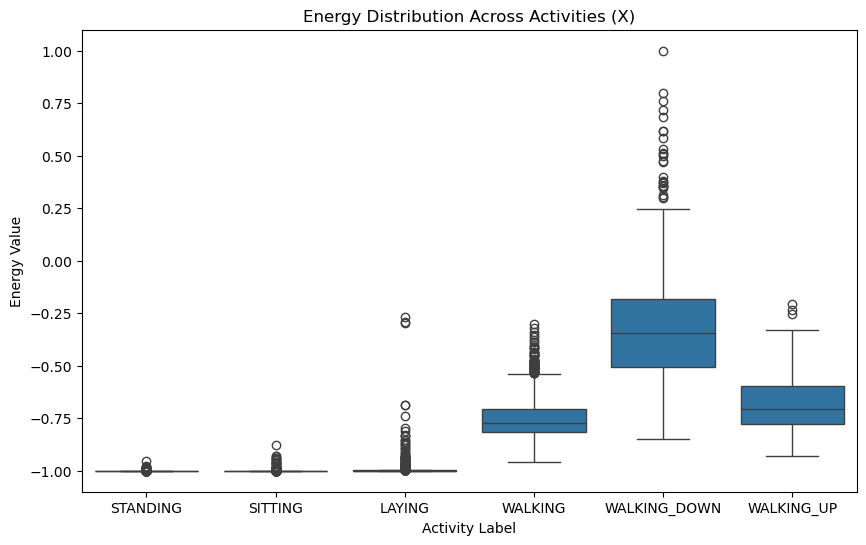

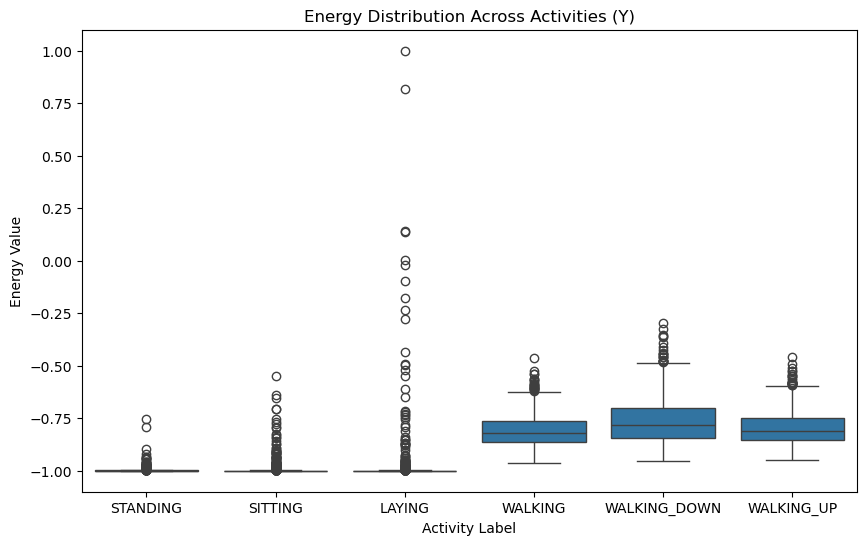

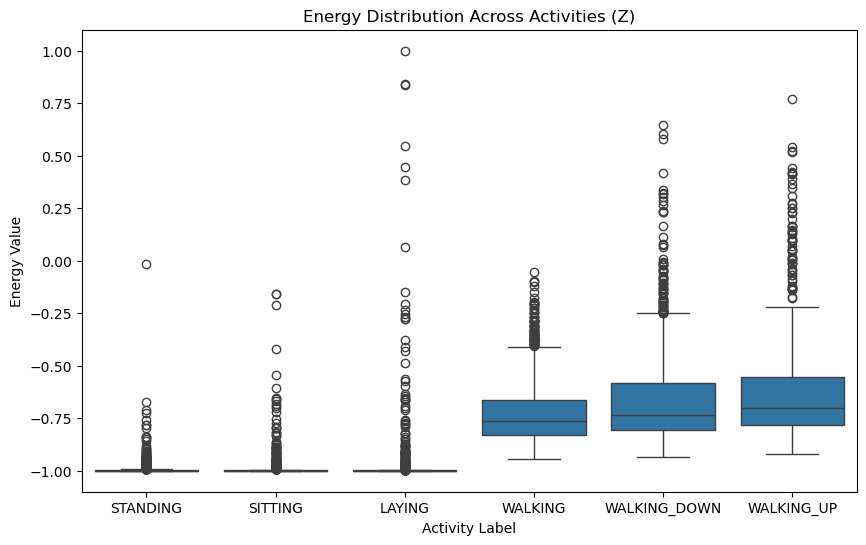

In [15]:
# Assume `labels` represents activity labels (e.g., 0: walking, 1: standing)
# Select energy features for the X, Y, and Z axes of body acceleration
energy_features = df.loc[:, [
    'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z']]

# Add the activity labels as a new column to the energy features DataFrame
energy_features['label'] = label_names.loc[labels-1, 'name'].values

# Create a boxplot to visualize the distribution of energy values for the X-axis
# across different activity labels
for ax in ['X', 'Y', 'Z']:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.boxplot(x='label', y=f'tBodyAcc-energy()-{ax}',
                data=energy_features)  # Create the boxplot
    # Set the plot title
    plt.title(f'Energy Distribution Across Activities ({ax})')
    plt.xlabel('Activity Label')  # Label for the x-axis
    plt.ylabel('Energy Value')  # Label for the y-axis
    plt.show()  # Display the plot

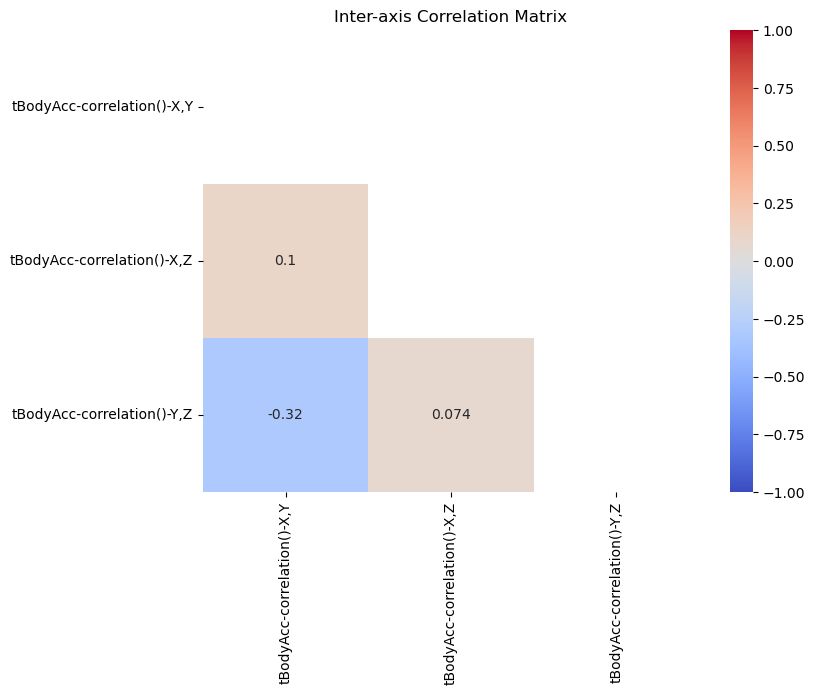

In [11]:
# Select accelerometer inter-axis correlation features
corr_features = df[['tBodyAcc-correlation()-X,Y',  # Correlation between X and Y axes
                    'tBodyAcc-correlation()-X,Z',  # Correlation between X and Z axes
                    'tBodyAcc-correlation()-Y,Z']]  # Correlation between Y and Z axes

# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(
    corr_features.corr(),  # Compute the correlation matrix of the selected features
    annot=True,  # Display correlation values on the heatmap
    cmap='coolwarm',  # Use the "coolwarm" colormap
    vmin=-1, vmax=1,  # Set the range of correlation values
    # Mask the upper triangle of the matrix
    mask=np.triu(np.ones_like(corr_features.corr()))
)

# Add a title to the heatmap
plt.title('Inter-axis Correlation Matrix')

# Display the heatmap
plt.show()

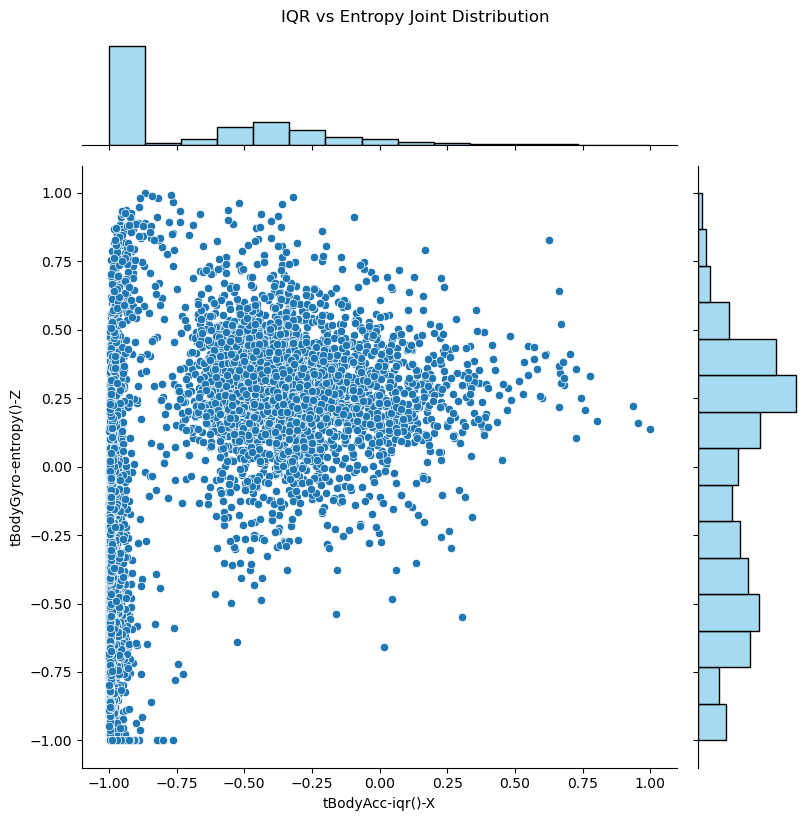

In [12]:
# Create a joint plot to visualize the relationship between two features:
# 'tBodyAcc-iqr()-X' (Interquartile Range of Body Acceleration on X-axis)
# and 'tBodyGyro-entropy()-Z' (Entropy of Body Gyroscope on Z-axis)
sns.jointplot(
    x='tBodyAcc-iqr()-X',  # Feature for the x-axis
    y='tBodyGyro-entropy()-Z',  # Feature for the y-axis
    data=df,  # Data source
    kind='scatter',  # Type of plot: scatter plot
    # Settings for marginal histograms
    marginal_kws={'bins': 15, 'color': 'skyblue'},
    height=8  # Size of the plot
)

# Add a title to the plot
plt.suptitle('IQR vs Entropy Joint Distribution', y=1.02)

# Display the plot
plt.show()

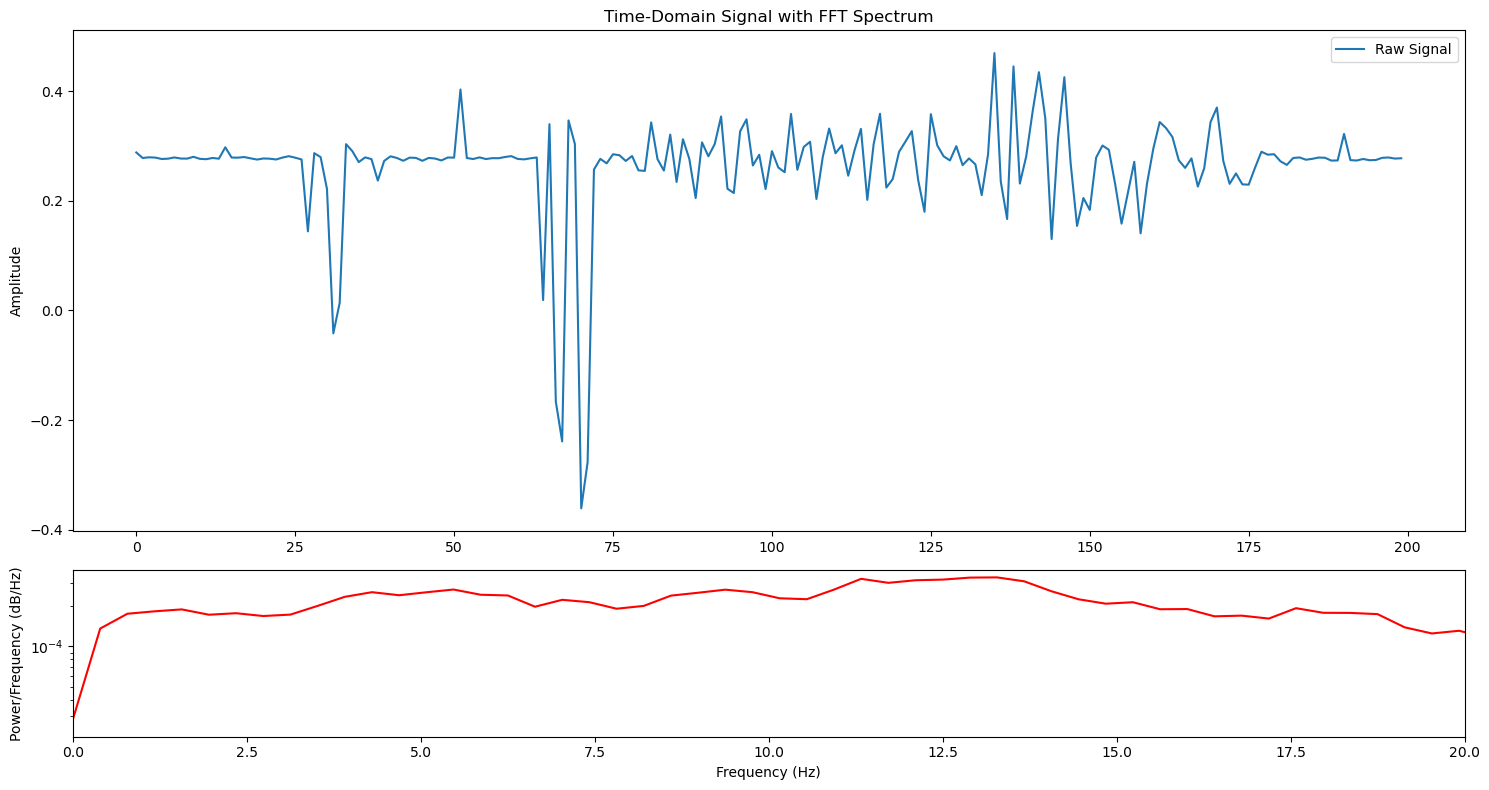

In [13]:
from scipy.signal import welch
import matplotlib.gridspec as gridspec

# Compute the Power Spectral Density (PSD) using Welch's method
fs = 50  # Sampling rate in Hz
# Compute PSD for the X-axis acceleration
f, Pxx = welch(df["tBodyAcc-mean()-X"], fs=fs, nperseg=128)

# Create a figure with a specified size
plt.figure(figsize=(15, 8))

# Use GridSpec to create a layout with two rows and one column
# The first row is 3 times taller than the second row
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Plot the time-domain signal
ax1 = plt.subplot(gs[0])  # Create a subplot for the time-domain signal
# Plot the first 200 samples of the signal
ax1.plot(df["tBodyAcc-mean()-X"][:200], label="Raw Signal")
# Set the title for the time-domain plot
ax1.set_title("Time-Domain Signal with FFT Spectrum")
ax1.set_ylabel("Amplitude")  # Label the y-axis
ax1.legend()  # Add a legend to the plot

# Plot the frequency-domain analysis (Power Spectral Density)
ax2 = plt.subplot(gs[1])  # Create a subplot for the frequency-domain analysis
# Plot the PSD on a logarithmic scale
ax2.semilogy(f, Pxx[:len(f)], color="red")
ax2.set_xlim(0, 20)  # Limit the x-axis to frequencies between 0 and 20 Hz
ax2.set_xlabel("Frequency (Hz)")  # Label the x-axis
ax2.set_ylabel("Power/Frequency (dB/Hz)")  # Label the y-axis

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()

In [14]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,  # Data source: the DataFrame containing sensor data
    x="tBodyAcc-mean()-X",  # X-axis: Mean body acceleration on the X-axis
    y="tBodyAcc-mean()-Y",  # Y-axis: Mean body acceleration on the Y-axis
    z="tBodyAcc-mean()-Z",  # Z-axis: Mean body acceleration on the Z-axis
    color=labels,  # Use activity labels to color the points
    symbol=labels,  # Use activity labels to differentiate points by symbol
    title="3D Sensor Data Visualization",  # Title of the 3D plot
    # Display additional data on hover
    hover_data=["tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z"]
)

# Update the layout of the 3D plot
fig.update_layout(scene=dict(
    xaxis_title="X-Axis Acceleration",  # Label for the X-axis
    yaxis_title="Y-Axis Acceleration",  # Label for the Y-axis
    zaxis_title="Z-Axis Acceleration"   # Label for the Z-axis
))

# Display the 3D scatter plot
fig.show()